# 3-Time Series Classification

## Univariate time series classfication

### The basic workflow
1. Specify data
2. Specify task: Which variate is the target variate, which ones are features?
3. Specify model
4. Fit
5. Predict

### Data

In [1]:
from warnings import simplefilter
simplefilter(action="ignore", category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sktime.datasets import load_UCR_UEA_dataset
from sktime.datatypes import convert

In [3]:
X, y = load_UCR_UEA_dataset("ItalyPowerDemand", return_X_y=True)
X = convert(X, from_type="nested_univ", to_type="numpy3D")

In [4]:
X.shape

(1096, 1, 24)

In [5]:
# binary target variate
np.unique(y)

array(['1', '2'], dtype='<U1')

[Text(0, 0.5, 'Scaled distance from midpoint'), Text(0.5, 0, 'Index')]

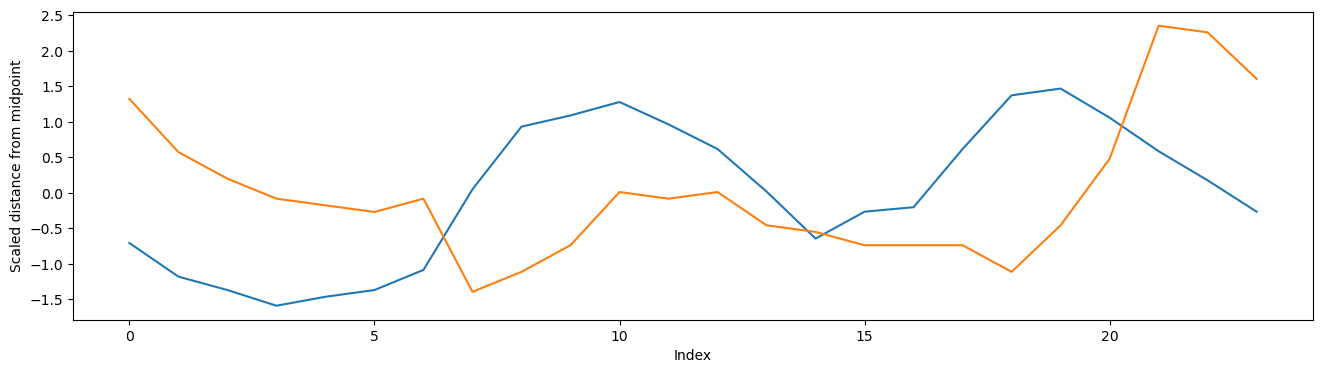

In [6]:
labels, counts = np.unique(y, return_counts=True)
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    ax.plot(X[y == label, 0, :][0], label=f"class {label}")
ax.set(ylabel="Scaled distance from midpoint", xlabel="Index")

### Train-test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

### Model specification

In [8]:
from sktime.classification.kernel_based import RocketClassifier

classifier = RocketClassifier()

### Fitting

In [9]:
%%time 
classifier.fit(X_train, y_train)

CPU times: user 3.34 s, sys: 743 ms, total: 4.08 s
Wall time: 2.69 s


RocketClassifier()

In [10]:
classifier.fit?

Signature: classifier.fit(X, y)
Docstring:
Fit time series classifier to training data.

Parameters
----------
X : 3D np.array (any number of dimensions, equal length series)
        of shape [n_instances, n_dimensions, series_length]
    or 2D np.array (univariate, equal length series)
        of shape [n_instances, series_length]
    or pd.DataFrame with each column a dimension, each cell a pd.Series
        (any number of dimensions, equal or unequal length series)
    or of any other supported Panel mtype
        for list of mtypes, see datatypes.SCITYPE_REGISTER
        for specifications, see examples/AA_datatypes_and_datasets.ipynb
y : 1D np.array of int, of shape [n_instances] - class labels for fitting
    indices correspond to instance indices in X

Returns
-------
self : Reference to self.

Notes
-----
Changes state by creating a fitted model that updates attributes
ending in "_" and sets is_fitted flag to True.
File:      /opt/conda/envs/sktime-pydata/lib/python3.9/site-pac

### Prediction

In [11]:
y_pred = classifier.predict(X_test)

### Evaluation

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9817518248175182

### Classifiers in sktime

In [13]:
from sktime.registry import all_estimators

all_estimators("classifier", return_names=False)

/opt/conda/envs/sktime-pydata/lib/python3.9/site-packages/sktime/utils/validation/_dependencies.py:113: UserWarning: str requires package 'dtw-python' to be present in the python environment, but 'dtw-python' was not found. 'dtw-python' is a soft dependency and not included in the base sktime installation. Please run: `pip install dtw-python` to install the dtw-python package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(msg)
/opt/conda/envs/sktime-pydata/lib/python3.9/site-packages/sktime/utils/validation/_dependencies.py:163: UserWarning: tensorflow
  warnings.warn(msg)
/opt/conda/envs/sktime-pydata/lib/python3.9/site-packages/sktime/utils/validation/_dependencies.py:113: UserWarning: No module named 'esig'. 'esig' is a soft dependency and not included in the sktime installation. Please run: `pip install esig` to install the esig package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(msg)
/opt/conda/

[sktime.classification.kernel_based._arsenal.Arsenal,
 sktime.classification.dictionary_based._boss.BOSSEnsemble,
 sktime.classification.deep_learning.cnn.CNNClassifier,
 sktime.classification.interval_based._cif.CanonicalIntervalForest,
 sktime.classification.feature_based._catch22_classifier.Catch22Classifier,
 sktime.classification.compose._pipeline.ClassifierPipeline,
 sktime.classification.compose._column_ensemble.ColumnEnsembleClassifier,
 sktime.classification.compose._ensemble.ComposableTimeSeriesForestClassifier,
 sktime.classification.dictionary_based._cboss.ContractableBOSS,
 sktime.classification.interval_based._drcif.DrCIF,
 sktime.classification.dummy._dummy.DummyClassifier,
 sktime.classification.distance_based._elastic_ensemble.ElasticEnsemble,
 sktime.classification.feature_based._fresh_prince.FreshPRINCE,
 sktime.classification.hybrid._hivecote_v1.HIVECOTEV1,
 sktime.classification.hybrid._hivecote_v2.HIVECOTEV2,
 sktime.classification.dictionary_based._boss.Individua

### Compare algorithms from sktime and scikit-learn

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sktime.transformations.panel.reduce import Tabularizer

classifier = make_pipeline(
    Tabularizer(), KNeighborsClassifier(n_neighbors=1, metric="euclidean")
)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9781021897810219

### Advanced model building & composition
- Pipelining
- Ensembling
- Tuning
- Reduction

#### Pipelining

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

In [16]:
%%time
classifier = make_pipeline(
    TSFreshFeatureExtractor(disable_progressbar=True, show_warnings=False),
    RandomForestClassifier(),
)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9817518248175182

## Interlude:Time series regression

### Basic workflow

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import load_benzene_concentration_sample

In [21]:
X, y = load_benzene_concentration_sample()

X.shape, y.shape

((300, 1, 240), (300,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

[Text(0.5, 0, 'target variable (bins)'), Text(0, 0.5, 'frequency')]

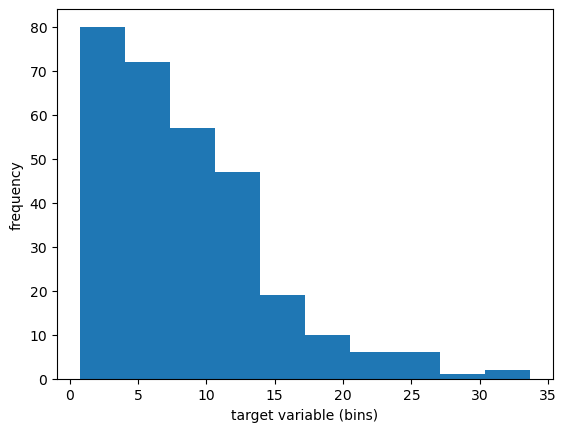

In [24]:
fig, ax = plt.subplots(1)
ax.hist(y)
ax.set(xlabel="target variable (bins)", ylabel="frequency")

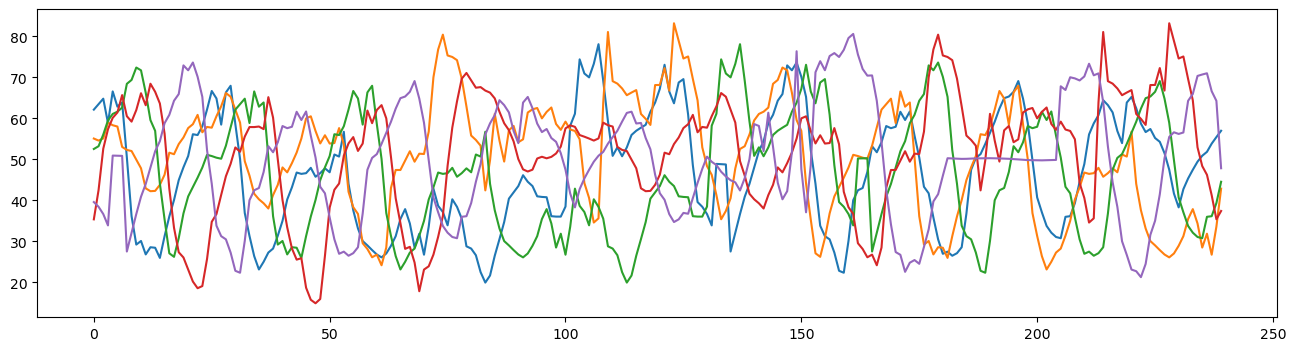

In [25]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for i in range(5):
    ax.plot(X_train[i,0,:])

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sktime.transformations.panel.rocket import Rocket

In [38]:
%%time
regressor = make_pipeline(Rocket(), RandomForestRegressor())
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

11.5030626044467

### Reducing forecasting to time series regression

In [39]:
import numpy as np
from sktime.datasets import load_airline
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

In [40]:
y = load_airline()
fh = np.arange(12) + 1
y_train, y_test = temporal_train_test_split(y, fh=fh)

In [41]:
forecaster = make_reduction(
    regressor, scitype="time-series-regressor", window_length=12
)

In [43]:
%%time
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.detrend import Detrender
pipe = TransformedTargetForecaster([("detrend", Detrender()), ("forecast", forecaster)])
pipe.fit(y_train)
y_pred = pipe.predict(fh)

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

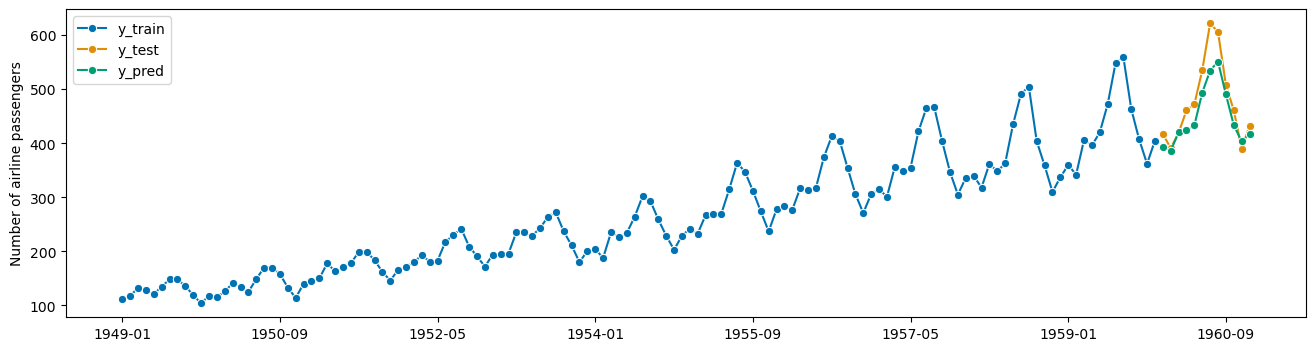

In [45]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

## Multivariate time series classification

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.transformations.panel.compose import ColumnConcatenator

In [48]:
X, y = load_UCR_UEA_dataset("BasicMotions", return_X_y=True)
X = convert(X, from_type="nested_univ", to_type="numpy3D")

X_train,X_test, y_train, y_test = train_test_split(X,y)

X_train,X_test, y_train,y_test = train_test_split(X,y)
list(map(lambda x: x.shape, [X_train,X_test, y_train,y_test]))

[(60, 6, 100), (20, 6, 100), (60,), (20,)]

In [49]:
# multi-class target variable
np.unique(y_train)

array(['badminton', 'running', 'standing', 'walking'], dtype='<U9')

## Multivariate classificatin

### Time series concatenation

In [51]:
steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", TimeSeriesForestClassifier(n_estimators=100)), 
]
classifier = Pipeline(steps)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

1.0